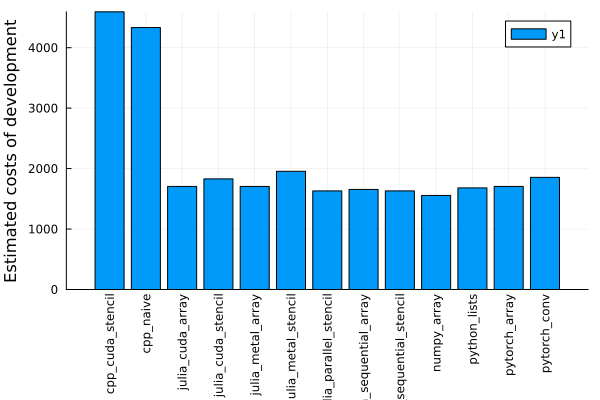

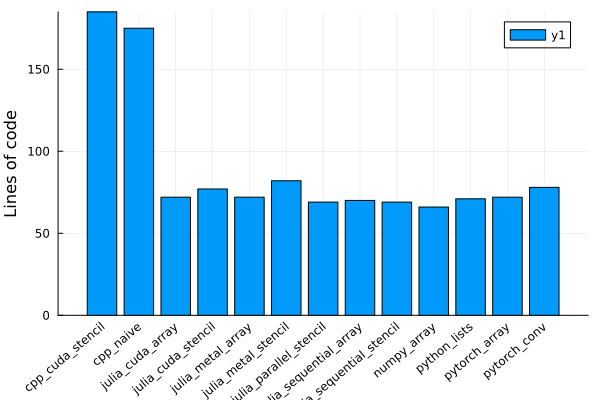

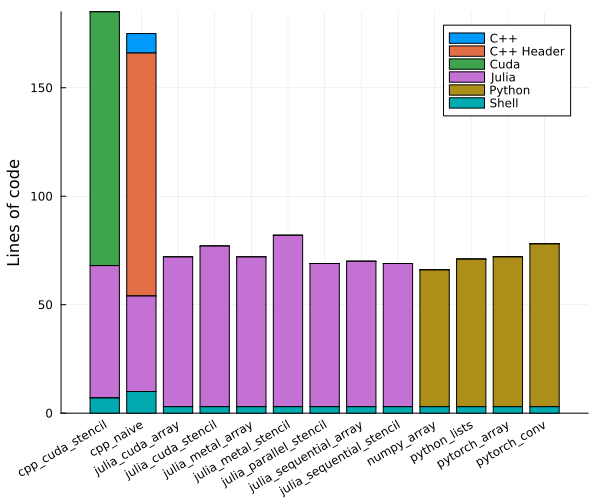

["C++", "C++ Header", "Cuda", "Julia", "Python", "Shell"]


"/Users/ole/Documents/Studium/master/hpc_seminar/hpc-lab/figures/loc_by_language.png"

In [54]:
using JSON
using StatsPlots

implementations = readdir("implementations")
implementations = filter(x -> isdir("implementations/$x"), implementations)
costs = zeros(length(implementations))
loc = zeros(length(implementations))
loc_by_lanugage = []
for (i, implementation) in enumerate(implementations)
    if isfile("implementations/$implementation/complexity.json")
        report = JSON.parsefile("implementations/$implementation/complexity.json")
        costs[i] = report["estimatedCost"]
        loc[i] = sum([x["Code"] for x in report["languageSummary"]])
        push!(loc_by_lanugage, Dict([x["Name"] => x["Code"] for x in report["languageSummary"]]))
    end
end
all_languages = unique(Iterators.flatten([keys(x) for x in loc_by_lanugage])) |> sort
println(all_languages)
loc_language_array = zeros(length(all_languages), length(implementations))
for (i, implementation) in enumerate(implementations)
    for (j, language) in enumerate(all_languages)
        loc_language_array[j, i] = get(loc_by_lanugage[i], language, 0)
    end
end
bar(costs, xticks=(eachindex(implementations), implementations), xrotation=90, ylabel="Estimated costs of development") |> display
bar(loc, xticks=(eachindex(implementations), implementations), xrotation=40, ylabel="Lines of code") |> display
p=groupedbar(loc_language_array',
    bar_position=:stack,
    label=hcat(all_languages...),
    xticks=(eachindex(implementations), implementations),
    xrotation=30,
    size=(600,500),
    ylabel="Lines of code",)
display(p)
savefig(p, "figures/loc_by_language.png")